<a href="https://colab.research.google.com/github/cyrus723/my-first-binder/blob/main/simple_regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source of data: FactSets (All ETFs with some cleaning)

In [1]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
import statsmodels.formula.api as smf
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import os 
os.getcwd()

'/content'

In [120]:
filename = 'https://raw.githubusercontent.com/cyrus723/my-first-binder/main/factsets_etf.csv'  

In [121]:
data = pd.read_csv(filename)  

In [122]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  1893 non-null   object 
 1   name    1893 non-null   object 
 2   issuer  1893 non-null   object 
 3   exp     1893 non-null   float64
 4   nav     1893 non-null   float64
 5   aum     1893 non-null   float64
 6   class   1893 non-null   object 
 7   beta    1893 non-null   float64
dtypes: float64(4), object(4)
memory usage: 118.4+ KB


In [123]:
data['scaled_aum'] = np.log(data['aum'])

In [124]:
data['aum_million'] = data['aum'] / 1000000

In [125]:
data.head()  

,ticker,name,issuer,exp,nav,aum,class,beta,scaled_aum,aum_million
0,SINV,ETFMG Prime 2X Daily Inverse Junior Silver Min...,ETFMG,1.0,11.9,115432.0,Equity,-2.1,11.656437,0.115432
1,B621WX,WisdomTree Short AUD Long EUR,WisdomTree,0.0,30.2,156868.0,Currency,-0.2,11.963160,0.156868
2,B68GS4,WisdomTree Long EUR Short USD,WisdomTree,0.0,29.8,166949.0,Currency,0.1,12.025444,0.166949
3,*CINC.B,CI DoubleLine Income USD Fund Unhedged,CI Financial Corp.,1.0,17.7,176787.0,Fixed Income,-0.3,12.082701,0.176787
4,B68GSP,WisdomTree Long JPY Short USD,WisdomTree,0.0,29.0,203339.0,Currency,-0.1,12.222630,0.203339


In [126]:
data.tail()  

,ticker,name,issuer,exp,nav,aum,class,beta,scaled_aum,aum_million
1888,BDR7WS,Hanwha ARIRANG S&P500 ETF(H),"HANWHA LIFE INSURANCE Co., Ltd.",0.0,17574.9,4.420000e+11,Equity,0.7,26.814576,442000.0
1889,BMJJF5,Hanwha Arirang SYNTH-MSCI Emerging Markets ETF(H),"HANWHA LIFE INSURANCE Co., Ltd.",1.0,10002.4,7.400000e+11,Equity,0.8,27.329916,740000.0
1890,BG8FBY,Hanwha ARIRANG KTB 3Y Futures ETF,"HANWHA LIFE INSURANCE Co., Ltd.",0.0,51743.0,7.540000e+11,Fixed Income,0.0,27.348658,754000.0
1891,B7W7BH,Hanwha ARIRANG Dividend ETF,"HANWHA LIFE INSURANCE Co., Ltd.",0.0,12555.7,2.030000e+12,Equity,0.8,28.339057,2030000.0
1892,B76Y8C,HANWHA ARIRANG 200 ETF,"HANWHA LIFE INSURANCE Co., Ltd.",0.0,35505.7,6.610000e+12,Equity,1.0,29.519605,6610000.0


### Summary Statistics

In [127]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ticker       1893 non-null   object 
 1   name         1893 non-null   object 
 2   issuer       1893 non-null   object 
 3   exp          1893 non-null   float64
 4   nav          1893 non-null   float64
 5   aum          1893 non-null   float64
 6   class        1893 non-null   object 
 7   beta         1893 non-null   float64
 8   scaled_aum   1893 non-null   float64
 9   aum_million  1893 non-null   float64
dtypes: float64(6), object(4)
memory usage: 148.0+ KB


In [128]:
data.describe().round(2)  

,exp,nav,aum,beta,scaled_aum,aum_million
count,1893.00,1893.00,1.893000e+03,1893.00,1893.00,1893.00
mean,0.55,994.99,8.829291e+09,0.66,18.42,8829.29
std,0.96,7030.29,1.620810e+11,0.67,2.55,162081.01
min,0.00,0.00,1.154320e+05,-4.90,11.66,0.12
25%,0.00,20.30,1.878199e+07,0.30,16.75,18.78
50%,0.00,29.50,8.541894e+07,0.70,18.26,85.42
75%,1.00,54.70,4.387002e+08,1.00,19.90,438.70
max,20.00,108546.70,6.610000e+12,4.40,29.52,6610000.00


In [129]:
data.aggregate([min,  
                np.mean,  
                np.std,  
                np.median,  
                max]  
).round(2)

,ticker,name,issuer,exp,nav,aum,class,beta,scaled_aum,aum_million
min,*ARB,15 FiCAS Active Crypto ETP,21Shares AG,0.00,0.00,1.154320e+05,Alternatives,-4.90,11.66,0.12
mean,NaN,NaN,NaN,0.55,994.99,8.829291e+09,NaN,0.66,18.42,8829.29
std,NaN,NaN,NaN,0.96,7030.29,1.620810e+11,NaN,0.67,2.55,162081.01
median,NaN,NaN,NaN,0.00,29.50,8.541894e+07,NaN,0.70,18.26,85.42
max,ZIG,iShares eb.rexx Government Germany UCITS ETF (DE),Zacks Investment Management,20.00,108546.70,6.610000e+12,Fixed Income,4.40,29.52,6610000.00


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ticker       1893 non-null   object 
 1   name         1893 non-null   object 
 2   issuer       1893 non-null   object 
 3   exp          1893 non-null   float64
 4   nav          1893 non-null   float64
 5   aum          1893 non-null   float64
 6   class        1893 non-null   object 
 7   beta         1893 non-null   float64
 8   scaled_aum   1893 non-null   float64
 9   aum_million  1893 non-null   float64
dtypes: float64(6), object(4)
memory usage: 148.0+ KB


In [132]:
data2 = data.groupby(by='class').mean()
data2

,exp,nav,aum,beta,scaled_aum,aum_million
class,,,,,,
Alternatives,1.820513,21.320513,1.186542e+08,0.235897,17.267977,118.654158
Asset Allocation,0.965517,395.551724,3.299403e+09,0.544828,17.414796,3299.403427
Commodities,0.412162,175.028378,1.406693e+09,0.477027,17.345794,1406.693136
Currency,1.032967,758.836264,2.028511e+08,0.648352,16.333805,202.851121
Equity,0.569337,852.437812,1.261168e+10,0.868906,18.660249,12611.676815
Fixed Income,0.257576,1957.354293,4.164261e+09,0.168434,18.875313,4164.260947


In [138]:
data['class'] = data['class'].replace(['Asset Allocation','Fixed Income' ], ['Asset_Allocation', "Fixed_Income"])

In [143]:
data2 = data.groupby(by='class').mean()
data2

,exp,nav,aum,beta,scaled_aum,aum_million
class,,,,,,
Alternatives,1.820513,21.320513,1.186542e+08,0.235897,17.267977,118.654158
Asset_Allocation,0.965517,395.551724,3.299403e+09,0.544828,17.414796,3299.403427
Commodities,0.412162,175.028378,1.406693e+09,0.477027,17.345794,1406.693136
Currency,1.032967,758.836264,2.028511e+08,0.648352,16.333805,202.851121
Equity,0.569337,852.437812,1.261168e+10,0.868906,18.660249,12611.676815
Fixed_Income,0.257576,1957.354293,4.164261e+09,0.168434,18.875313,4164.260947


In [144]:
data3 = data.rename({'class': 'asset_class'}, axis=1, inplace=False)


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ticker       1893 non-null   object 
 1   name         1893 non-null   object 
 2   issuer       1893 non-null   object 
 3   exp          1893 non-null   float64
 4   nav          1893 non-null   float64
 5   aum          1893 non-null   float64
 6   class        1893 non-null   object 
 7   beta         1893 non-null   float64
 8   scaled_aum   1893 non-null   float64
 9   aum_million  1893 non-null   float64
dtypes: float64(6), object(4)
memory usage: 148.0+ KB


In [146]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ticker       1893 non-null   object 
 1   name         1893 non-null   object 
 2   issuer       1893 non-null   object 
 3   exp          1893 non-null   float64
 4   nav          1893 non-null   float64
 5   aum          1893 non-null   float64
 6   asset_class  1893 non-null   object 
 7   beta         1893 non-null   float64
 8   scaled_aum   1893 non-null   float64
 9   aum_million  1893 non-null   float64
dtypes: float64(6), object(4)
memory usage: 148.0+ KB


In [149]:
data4 = pd.get_dummies(data3, columns=['asset_class'])

In [150]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ticker                        1893 non-null   object 
 1   name                          1893 non-null   object 
 2   issuer                        1893 non-null   object 
 3   exp                           1893 non-null   float64
 4   nav                           1893 non-null   float64
 5   aum                           1893 non-null   float64
 6   beta                          1893 non-null   float64
 7   scaled_aum                    1893 non-null   float64
 8   aum_million                   1893 non-null   float64
 9   asset_class_Alternatives      1893 non-null   uint8  
 10  asset_class_Asset_Allocation  1893 non-null   uint8  
 11  asset_class_Commodities       1893 non-null   uint8  
 12  asset_class_Currency          1893 non-null   uint8  
 13  ass

## Regression Analysis

In [157]:
data5 = data4[['exp', 
              'scaled_aum', 
              'beta', 
              'asset_class_Alternatives',
              'asset_class_Commodities',
              'asset_class_Currency',
              'asset_class_Equity',
              'asset_class_Fixed_Income']].dropna()

In [158]:
data5.describe()

,exp,scaled_aum,beta,asset_class_Alternatives,asset_class_Commodities,asset_class_Currency,asset_class_Equity,asset_class_Fixed_Income
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,0.552034,18.423791,0.658162,0.020602,0.078183,0.048072,0.613312,0.209192
std,0.964520,2.549140,0.665928,0.142086,0.268530,0.213975,0.487120,0.406839
min,0.000000,11.656437,-4.900000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,16.748409,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,18.263078,0.700000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,19.899327,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,20.000000,29.519605,4.400000,1.000000,1.000000,1.000000,1.000000,1.000000


In [159]:
data6 = data5.loc[data5['exp'] <= 3]

In [160]:
data6.describe()

,exp,scaled_aum,beta,asset_class_Alternatives,asset_class_Commodities,asset_class_Currency,asset_class_Equity,asset_class_Fixed_Income
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,0.506638,18.426578,0.659480,0.018056,0.078598,0.047796,0.614976,0.210303
std,0.583454,2.550354,0.666672,0.133190,0.269182,0.213391,0.486730,0.407632
min,0.000000,11.656437,-4.900000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,16.748837,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,18.263078,0.700000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,19.901608,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.000000,29.519605,4.400000,1.000000,1.000000,1.000000,1.000000,1.000000


In [161]:
data7 = data6[['exp', 'scaled_aum']].dropna()

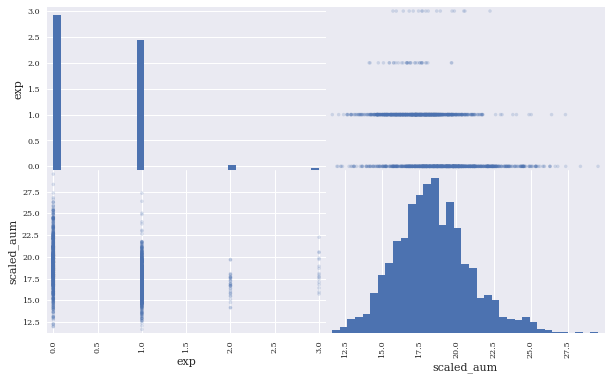

In [162]:
pd.plotting.scatter_matrix(data7,  
                           alpha=0.2,  
                           diagonal='hist',  
                           hist_kwds={'bins': 35},  
                           figsize=(10, 6));
# plt.savefig('../../images/ch08/fts_11.png');

In [163]:
data7 = data6[['exp', 'beta']].dropna()

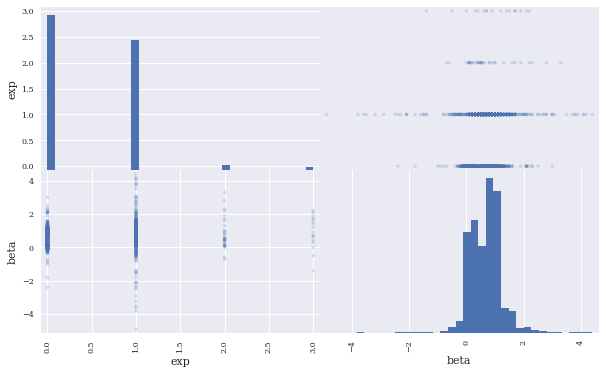

In [164]:
pd.plotting.scatter_matrix(data7,  
                           alpha=0.2,  
                           diagonal='hist',  
                           hist_kwds={'bins': 35},  
                           figsize=(10, 6));
# plt.savefig('../../images/ch08/fts_11.png');

### OLS Regression

In [165]:
reg = np.polyfit(data6['exp'], data6['scaled_aum'], deg=1)  

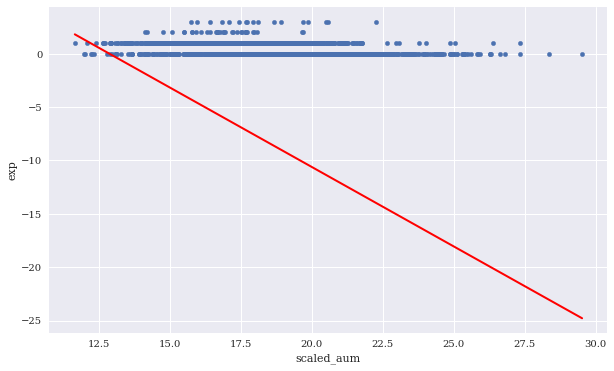

In [166]:
ax = data6.plot(kind='scatter', x='scaled_aum', y='exp', figsize=(10, 6))  
ax.plot(data6['scaled_aum'], np.polyval(reg, data6['scaled_aum']), 'r', lw=2);  
# plt.savefig('../../images/ch08/fts_12.png');

In [170]:
formula = 'exp ~ scaled_aum + beta + asset_class_Commodities+	asset_class_Currency+	asset_class_Equity	+asset_class_Fixed_Income'
results = smf.ols(formula, data6).fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                    exp   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     79.80
Date:                Wed, 18 May 2022   Prob (F-statistic):           4.58e-89
Time:                        23:31:54   Log-Likelihood:                -1442.8
No. Observations:                1883   AIC:                             2900.
Df Residuals:                    1876   BIC:                             2938.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### Correlation

In [171]:
data2.corr()  

,exp,nav,aum,beta,scaled_aum,aum_million
exp,1.000000,-0.626718,-0.445960,-0.164197,-0.559892,-0.445960
nav,-0.626718,1.000000,0.335254,-0.191956,0.633204,0.335254
aum,-0.445960,0.335254,1.000000,0.587259,0.730016,1.000000
beta,-0.164197,-0.191956,0.587259,1.000000,-0.105800,0.587259
scaled_aum,-0.559892,0.633204,0.730016,-0.105800,1.000000,0.730016
aum_million,-0.445960,0.335254,1.000000,0.587259,0.730016,1.000000
